# Import libraries

In [36]:
import os
from re import search
from dfply import *

# Load settings

In [37]:
if search("ricard", os.uname()[1]):
    exec(open('/Users/ricard/gastrulation_multiome_10x/settings.py').read())
    exec(open('/Users/ricard/gastrulation_multiome_10x/utils.py').read())
elif search("ebi", os.uname()[1]):
    exec(open('/homes/ricard/gastrulation_multiome_10x/settings.py').read())
    exec(open('/homes/ricard/gastrulation_multiome_10x/utils.py').read())
else:
    exit("Computer not recognised")

## Define I/O

In [38]:
# io["outdir"] = io["basedir"] + "/..."

## Define options 

scanpy options

In [52]:
# %%capture
# sc.settings.verbosity = 3
# sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80, frameon=False, figsize=(8, 7), facecolor='white')

# Load anndata object

In [68]:
io["anndata"] = "/Users/ricard/data/gastrulation_multiome_10x/processed/rna/scanpy/anndata.h5ad"

In [69]:
adata = sc.read(io["anndata"])
adata

AnnData object with n_obs × n_vars = 27195 × 32245
    obs: 'sample', 'stage', 'nFeature_RNA', 'mtFraction_RNA', 'celltype.mapped', 'celltype.score'
    uns: 'celltype.mapped_colors'

In [78]:
# colPalette_celltypes = [opts["celltype_colors"][i.replace(" ","_")] for i in sorted(np.unique(adata.obs['celltype.mapped']))]
# adata.uns['celltype.mapped_colors'] = colPalette_celltypes
# adata.write(filename=io["anndata"])
colPalette_celltypes

['#532C8A',
 '#c19f70',
 '#f9decf',
 '#c9a997',
 '#B51D8D',
 '#3F84AA',
 '#9e6762',
 '#354E23',
 '#F397C0',
 '#ff891c',
 '#635547',
 '#C72228',
 '#f79083',
 '#EF4E22',
 '#989898',
 '#7F6874',
 '#8870ad',
 '#647a4f',
 '#EF5A9D',
 '#FBBE92',
 '#139992',
 '#cc7818',
 '#DFCDE4',
 '#8EC792',
 '#C594BF',
 '#C3C388',
 '#0F4A9C',
 '#FACB12',
 '#8DB5CE',
 '#1A1A1A',
 '#C9EBFB',
 '#DABE99',
 '#65A83E',
 '#005579',
 '#CDE088',
 '#f7f79e',
 '#F6BFCB']

In [71]:
adata = adata[adata.obs["stage"]=="E8.5",]
adata

View of AnnData object with n_obs × n_vars = 14502 × 32245
    obs: 'sample', 'stage', 'nFeature_RNA', 'mtFraction_RNA', 'celltype.mapped', 'celltype.score'
    uns: 'celltype.mapped_colors'

# Feature selection and normalisation

In [72]:
sc.pp.filter_genes(adata, min_counts=25)
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
adata

Trying to set attribute `.var` of view, copying.


AnnData object with n_obs × n_vars = 14502 × 19745
    obs: 'sample', 'stage', 'nFeature_RNA', 'mtFraction_RNA', 'celltype.mapped', 'celltype.score'
    var: 'n_counts'
    uns: 'celltype.mapped_colors', 'log1p'

# Dimensionality reduction

## PCA

Run PCA

In [73]:
sc.tl.pca(adata, svd_solver='arpack')

Plot PCA

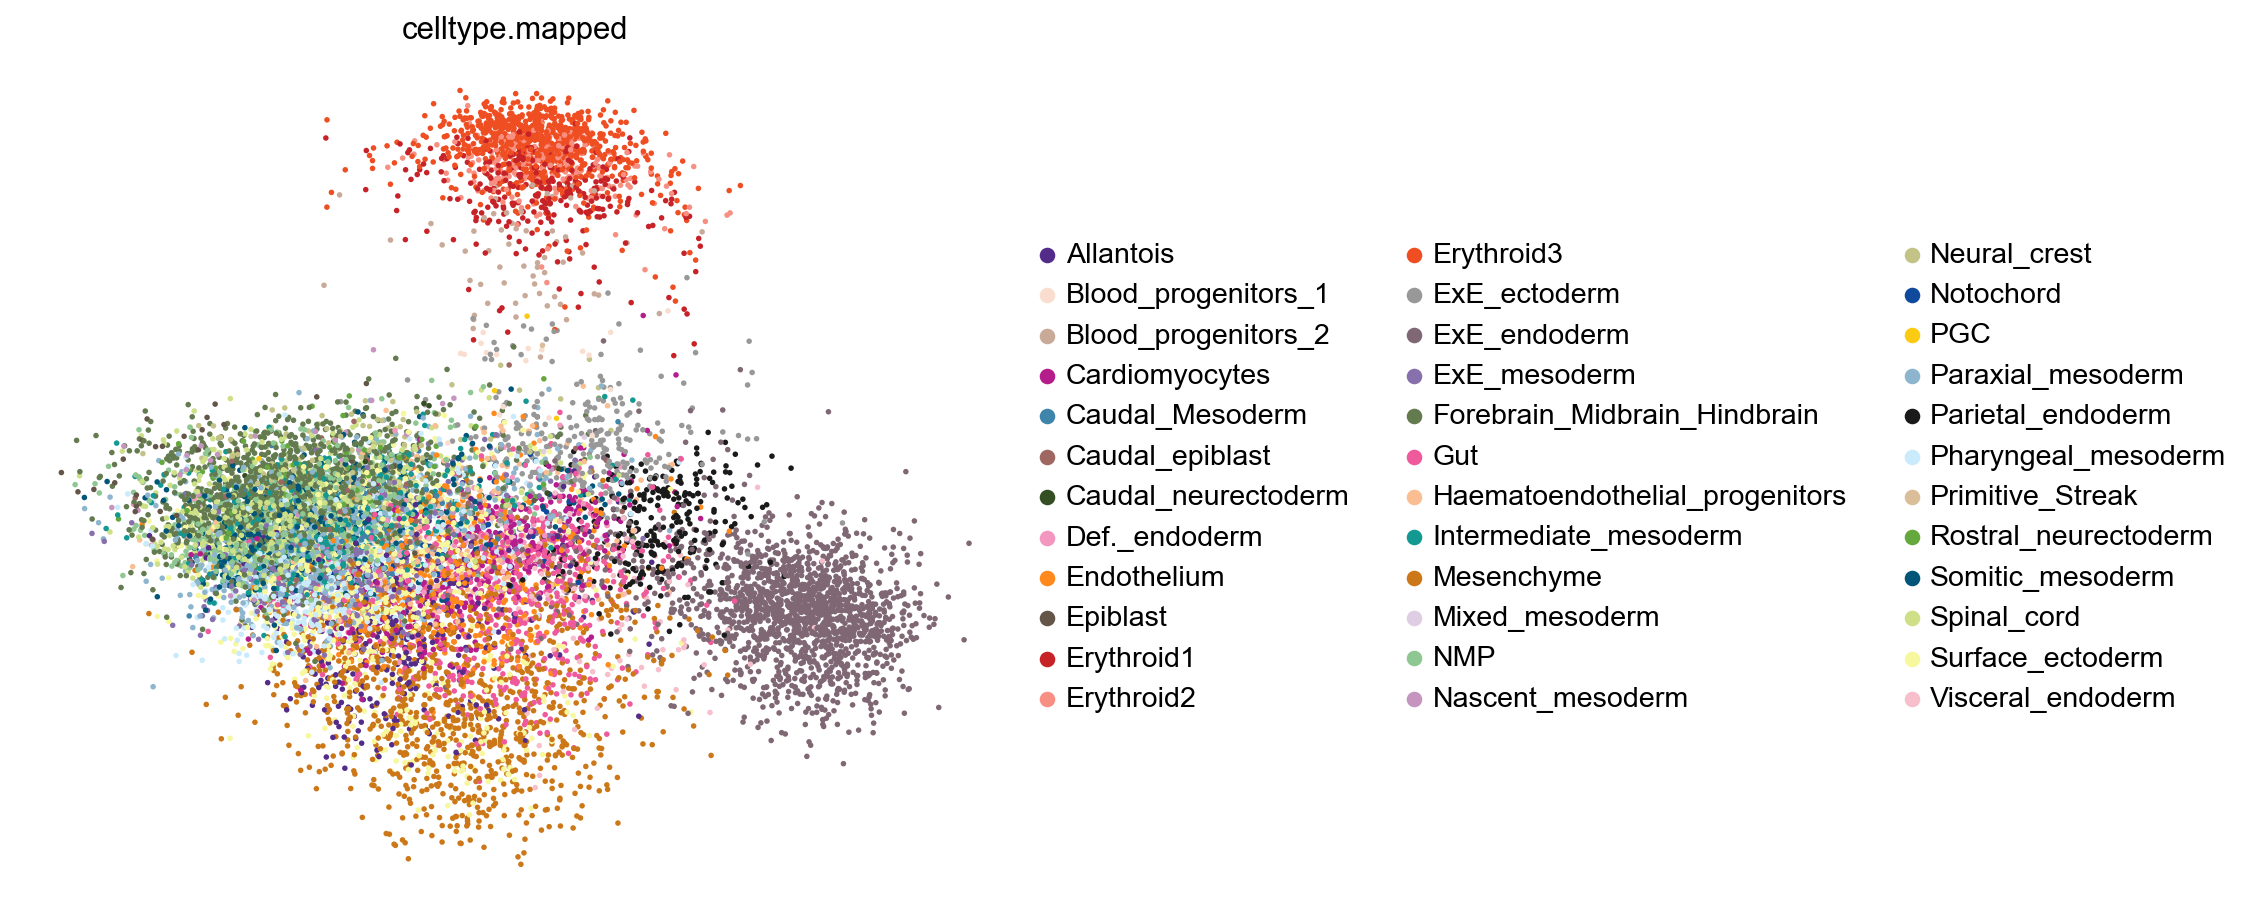

In [74]:
sc.pl.pca(adata, components=[1,2], color=["celltype.mapped"], size=25)

## k-NN graph

Build kNN graph

In [75]:
sc.pp.neighbors(adata, n_neighbors=25, n_pcs=50)

## UMAP

Run UMAP

In [76]:
sc.tl.umap(adata, min_dist=0.5, n_components=2)

Plot UMAP

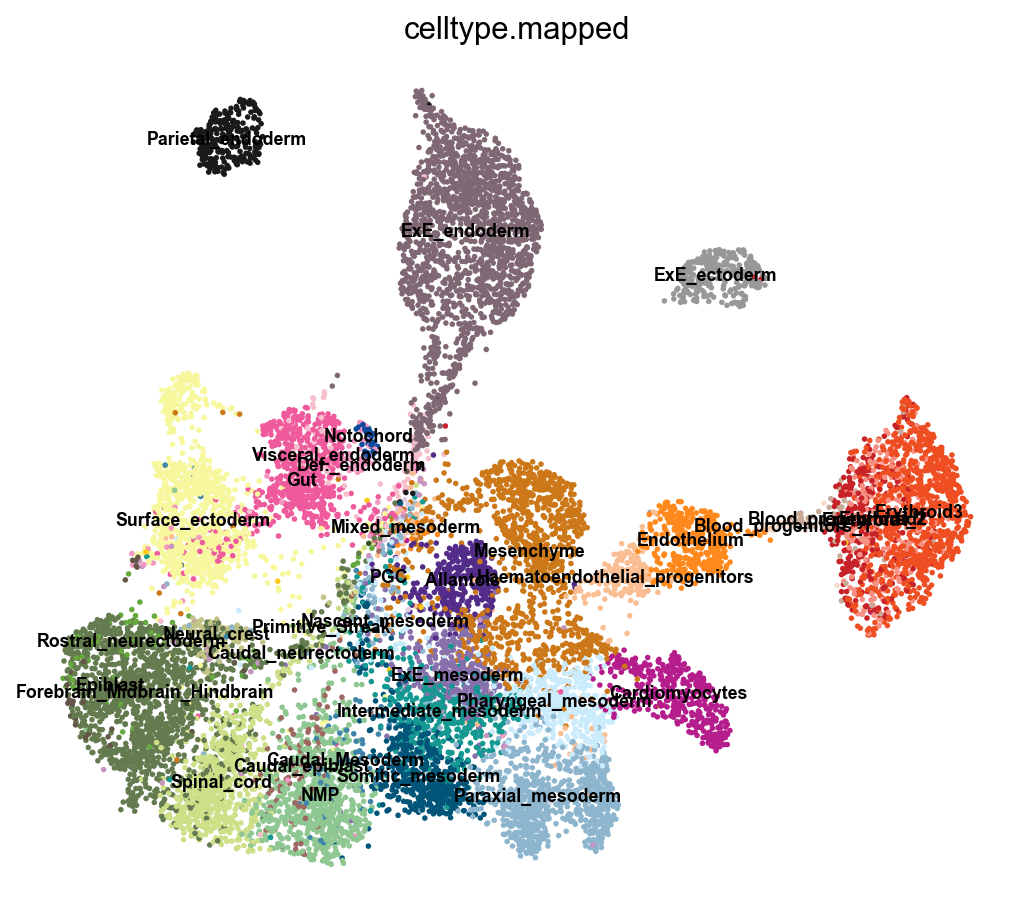

In [77]:
sc.pl.umap(adata, color=["celltype.mapped"], size=25, legend_loc="on data",  legend_fontsize=8)